In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr


Text(0.5, 1.0, 'Resized Image')

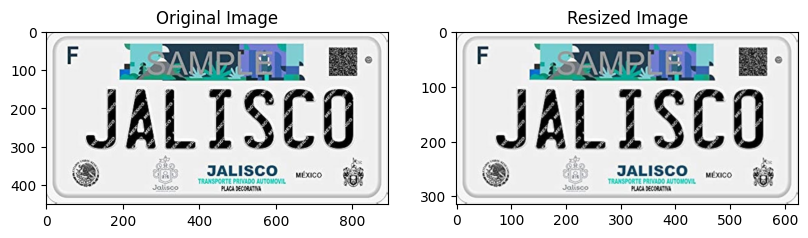

In [7]:

# Load the license plate image
#imagen = cv2.imread("placa_2.jpg")
imagen = cv2.imread("placa_q.jpg")
#imagen = cv2.imread("placa_3.jpg")
#imagen = cv2.imread("placa_4.jpg")

# Change color from BGR to RGB for display
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Create figure for displaying all processing steps
plt.figure(figsize=(15, 12))

# Display original image
plt.subplot(3, 3, 1)
plt.imshow(imagen_rgb)
plt.title("Original Image")

# Step 1: Resize the image (downscale)
height, width = imagen.shape[:2]
scale_factor = 0.7  # Reduce to 70% of original size
new_width = int(width * scale_factor)
new_height = int(height * scale_factor)
resized = cv2.resize(imagen, (new_width, new_height), interpolation=cv2.INTER_AREA)
resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

plt.subplot(3, 3, 2)
plt.imshow(resized_rgb)
plt.title("Resized Image")
    


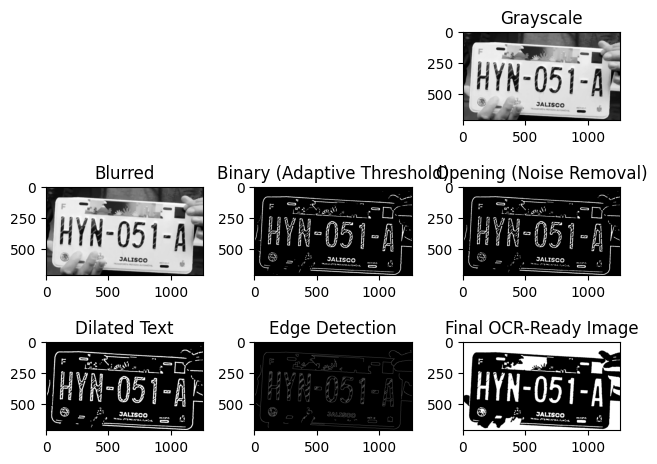

Image processing complete. The image has been optimized for OCR and saved as 'processed_license_plate.jpg'


In [5]:
# Step 2: Convert to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

plt.subplot(3, 3, 3)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")

# Step 3: Apply Gaussian blur to reduce noise and small details
# This helps remove the small text in the license plate
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.subplot(3, 3, 4)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred")

# Step 4: Apply adaptive thresholding for better text extraction
# This will separate the characters from background more effectively
binary = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY_INV, 21, 10
)

plt.subplot(3, 3, 5)
plt.imshow(binary, cmap='gray')
plt.title("Binary (Adaptive Threshold)")

# Step 5: Apply morphological operations to enhance text
kernel = np.ones((3, 3), np.uint8)

# Opening operation (erosion followed by dilation)
# This removes small noise
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

plt.subplot(3, 3, 6)
plt.imshow(opening, cmap='gray')
plt.title("Opening (Noise Removal)")

# Dilation to make characters thicker and more readable
dilated = cv2.dilate(opening, kernel, iterations=1)

plt.subplot(3, 3, 7)
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Text")

# Step 6: Edge detection for character boundaries
edges = cv2.Canny(blurred, 50, 150)

plt.subplot(3, 3, 8)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")

# Step 7: Create a final black and white image optimized for OCR
# For better OCR, apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Combine with previous processing
final_ocr_image = cv2.bitwise_or(dilated, otsu_thresh)

plt.subplot(3, 3, 9)
plt.imshow(final_ocr_image, cmap='gray')
plt.title("Final OCR-Ready Image")

plt.tight_layout()
plt.show()

# Save the processed image for OCR
#cv2.imwrite("processed_license_plate.jpg", final_ocr_image)
print("Image processing complete. The image has been optimized for OCR and saved as 'processed_license_plate.jpg'")